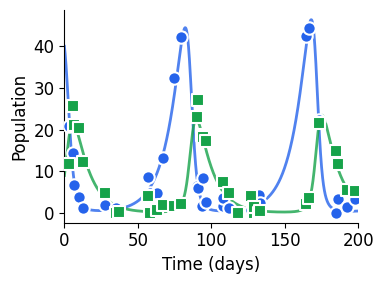

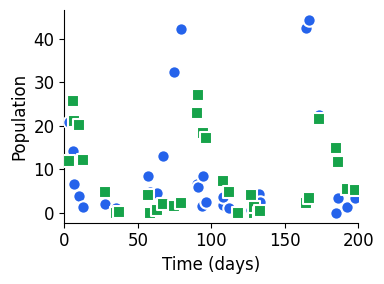

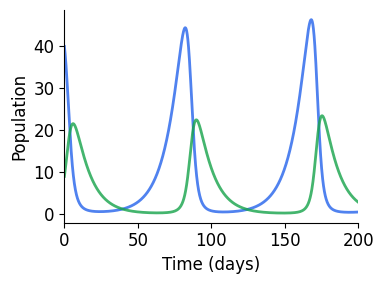

Parameters: α=0.1, β=0.02, δ=0.01, γ=0.1
Number of observations: 35
Noise std (prey/predator): 3.0/2.0


In [20]:
import sys
from pathlib import Path

# Add src directory to path for imports
sys.path.insert(0, str(Path().resolve().parent))

import numpy as np
import matplotlib.pyplot as plt
from simulators import simulate

# Set a nice style
plt.rcParams.update({
    'figure.facecolor': 'None',
    'axes.facecolor': 'None',
    'axes.grid': False,
    # 'grid.alpha': 0.3,
    'font.size': 12,
})

# Fixed parameters for the Lotka-Volterra model
# α: prey birth rate, β: predation rate, δ: predator reproduction, γ: predator death
alpha = 0.1
beta = 0.02
delta = 0.01
gamma = 0.1

parameters = np.array([alpha, beta, delta, gamma])

# Simulate the model
time = np.arange(0, 200, 0.1)
populations = simulate(parameters)

prey = populations[:, 0]
predator = populations[:, 1]

# Create noisy "observations" at sparse time points
np.random.seed(42)
n_observations = 35  # Number of observation points
obs_indices = np.sort(np.random.choice(len(time), n_observations, replace=False))
obs_time = time[obs_indices]

# Add Gaussian noise to create observations
noise_std_prey = 3.0
noise_std_predator = 2.0
obs_prey = np.maximum(prey[obs_indices] + np.random.normal(0, noise_std_prey, n_observations),0)
obs_predator = np.maximum(predator[obs_indices] + np.random.normal(0, noise_std_predator, n_observations),0)

# --- Plot 1: Simulation + Observations (both species) ---
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(time, prey, color='#2563eb', linewidth=2, label='Prey (simulation)', alpha=0.8)
ax.plot(time, predator, color='#16a34a', linewidth=2, label='Predator (simulation)', alpha=0.8)
ax.scatter(obs_time, obs_prey, color='#2563eb', s=80, zorder=5,
           edgecolors='white', linewidth=1.5, marker='o', label='Prey (obs.)')
ax.scatter(obs_time, obs_predator, color='#16a34a', s=80, zorder=5,
           edgecolors='white', linewidth=1.5, marker='s', label='Predator (obs.)')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')
# ax.legend(loc='upper right')
ax.set_xlim(0, 200)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# --- Plot 2: Observations only (both species) ---
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(obs_time, obs_prey, color='#2563eb', s=80, zorder=5,
           edgecolors='white', linewidth=1.5, marker='o', label='Prey')
ax.scatter(obs_time, obs_predator, color='#16a34a', s=80, zorder=5,
           edgecolors='white', linewidth=1.5, marker='s', label='Predator')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')
# ax.legend(loc='upper right')
ax.set_xlim(0, 200)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# --- Plot 3: Simulation only (both species) ---
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(time, prey, color='#2563eb', linewidth=2, label='Prey', alpha=0.8)
ax.plot(time, predator, color='#16a34a', linewidth=2, label='Predator', alpha=0.8)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')
# ax.legend(loc='upper right')
ax.set_xlim(0, 200)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(f"Parameters: α={alpha}, β={beta}, δ={delta}, γ={gamma}")
print(f"Number of observations: {n_observations}")
print(f"Noise std (prey/predator): {noise_std_prey}/{noise_std_predator}")